# The Theater Row Problem

Assume that we have a theater row of length $2n+1$. A total of $n$ women bought tickets at random in the row and a total of $n+1$ men have bought tickets at random in the row. We consider that a couple can be formed when a man and a woman are sitting next to each other. How many potential couples can be found in this row on average?

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

np.random.seed(54321)

We make the choice of representing a row of length $2n+1$ as a one dimensional array of $0$, women, and $1$, men. As an example of $n=1$ one suck row would be $[0,1,1]$.

We choose a random sampling approach to estimate the average number of potential couples in a row of a give length. That is we generate uniformly at random a large number of rows of a given length, calculate the number of potential couples for each row in the sample and finally take the average over this sample to get the estimated average number of potential couples.

The first function takes a given row and simply count the number of potential couples according to the rules.

In [2]:
def count_potential_couples(row):
    """ Counting the potential couples
    
    Takes a give row and count the potential couples as per the formation rule.
    
    Arguments:
    ==========
        row : array of 0 and 1
    
    Returns:
    ========
        pCouples : integer, total number of potential couples in the row
    """
    pCouples = 0
    for i in range(1,len(row)):
        if row[i-1] != row[i]:
            pCouples += 1
    return pCouples;

We then make up a function that generates a random row of fixed length.

In [3]:
def generate_random_row(n):
    """ Generating one random row
    
    Generates a random row of length 2n+1.
    
    Arguments:
    ==========
        n : integer, corresponds to number of 0 in the 2n+1 row
        
    Returns:
    ========
        random_row : array of 0,1 integers
    """
    wCount = n
    mCount = n + 1
    urn = [0]*wCount + [1]*mCount
    random_row = np.random.choice(urn, len(urn), replace = False)
    return random_row;

Finally we code a function to calculate the estimated average over a sample of randomly generated rows.

In [4]:
def estimate_avg_pCouples(trials, n):
    """ Sampling estimation of the average number of potential couples
    
    Uses repeated sampling of rows of length 2n+1 to calculate the average number of potential couples over the sampled set.
    
    Arguments:
    ==========
        trials : integer, number of times to repeat the sampling process
        
        n : integer, corresponds to the number of 0 in the 2n+1 row
        
    Returns:
    ========
         : float, estimated average of potential couples for rows of length 2n+1
    """
    pCouples = 0
    for i in range(trials):
        pCouples += count_potential_couples(generate_random_row(n))
    return float(pCouples) / trials; 

We run this estimation process for the first few values of $n$:

     Averages   N
0    1.333561   1
1    2.399610   2
2    3.429867   3
3    4.445300   4
4    5.455299   5
5    6.462415   6
6    7.469665   7
7    8.469475   8
8    9.470442   9
9   10.478465  10
10  11.477162  11
11  12.480784  12
12  13.481134  13
13  14.483524  14
14  15.485536  15
15  16.477920  16
16  17.488242  17
17  18.488750  18
18  19.486653  19
19  20.481907  20
20  21.488050  21
21  22.488221  22
22  23.488535  23
23  24.490597  24
24  25.494537  25
25  26.497599  26
26  27.495681  27
27  28.492598  28
28  29.496454  29
29  30.490323  30
30  31.491532  31
31  32.489279  32
32  33.487737  33
33  34.499620  34
34  35.493380  35
35  36.492072  36
36  37.497226  37
37  38.493548  38
38  39.486261  39
39  40.494955  40
40  41.484341  41
41  42.490416  42
42  43.494256  43
43  44.494375  44
44  45.489497  45
45  46.500592  46
46  47.490142  47
47  48.501760  48
48  49.490083  49
49  50.497401  50


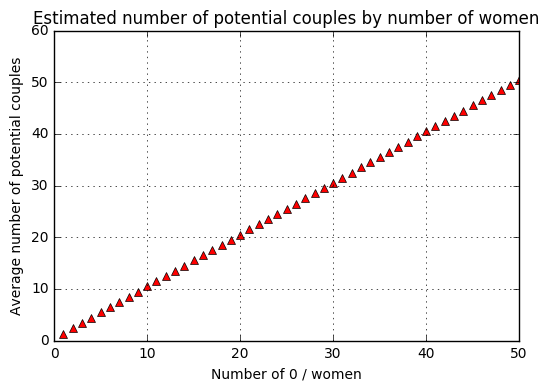

In [7]:
trials = 1000000
max_n = 50
estimated_avgs = []
for n in range(1, max_n+1):
    estimated_avgs.append(estimate_avg_pCouples(trials, n))
df = pd.DataFrame({'Averages': estimated_avgs, 'N': range(1, max_n+1)})
print df

plt.xlabel('Number of 0 / women')
plt.ylabel('Average number of potential couples')
plt.title('Estimated number of potential couples by number of women')
plt.plot(range(1, max_n+1), df['Averages'], 'r^')
plt.grid(True)
plt.show()